## Import all the libraries

In [7]:
import pandas as pd
import feat_eng as fe
import fischers as fd
import perceptron as pe
import logistic_reg as lr
import numpy
import random
import matplotlib.pyplot as plt

# Perceptron Learning Algorithm

## Task 1
Build a classifier (Perceptron Model - PM1) using the perceptron algorithm.
Figure out whether the data set is linearly separable by building the model. By changing the order
of the training examples, build another classifier (PM2) and outline the differences between the
models – PM1 and PM2. 

In [8]:
data= pd.read_csv("dataset.csv")
seed = random.randint(1,100)
training= data.sample(frac=0.67, random_state=seed)
test = data.drop(training.index)
pm1 = pe.Perceptron(training=training, test=test)
pm2 = pe.Perceptron(training=training.sample(frac = 1), test=test.sample(frac = 1))
pm1acc = pm1.perceptron(epochs=10000)
pm2acc = pm2.perceptron(epochs=10000)
print("Accuracy of PM1 = ", pm1acc, "%")
print("Accuracy of PM2 = ", pm2acc, "%")

Accuracy of PM1 =  87.76595744680851 %
Accuracy of PM2 =  94.68085106382979 %


## Task 2
Build a classifier (Perceptron Model - PM3) using the perceptron algorithm on
the normalized data and figure out the difference between the two classifiers (PM1 and PM3).

In [9]:
training_fe = fe.FeatureEngineering(training.copy())
training_fe.task1()
training_fe.task2()
test_fe = fe.FeatureEngineering(test.copy())
test_fe.task1()
test_fe.task2()
pm3 = pe.Perceptron(training=training_fe.ds, test=test_fe.ds)
pm3acc = pm3.perceptron(epochs=10000)
print("Accuracy of PM1 = ", pm1acc, "%")
print("Accuracy of PM3 = ", pm3acc, "%")

Accuracy of PM1 =  87.76595744680851 %
Accuracy of PM3 =  95.74468085106383 %


## Task 3
Change the order of features in the dataset randomly. Equivalently speaking,
for an example of feature tuple (f1, f2, f3, f4, . . , f32), consider a random permutation (f3, f1, f4,
f2, f6, ….., f32) and build a classifier (Perceptron Model – PM4). Would there be any change in
the model, PM4, as compared to PM1. If so, outline the differences in the models and their
respective performances.

In [10]:
seed2 = random.randint(1,100)
pm4 = pe.Perceptron(training=training.sample(frac=1, axis=1,random_state=seed2), test=test.sample(frac=1, axis=1, random_state=seed2))
pm4acc = pm4.perceptron(epochs=10000)
print("Accuracy of PM1 = ", pm1acc, "%")
print("Accuracy of PM4 = ", pm4acc, "%")

Accuracy of PM1 =  87.76595744680851 %
Accuracy of PM4 =  87.76595744680851 %


# Fisher’s Linear Discriminant Analysis

## Task 1
Build Fisher’s linear discriminant model (FLDM1) on the training data and thus
reduce 32dimensional problem to univariate dimensional problem. Find out the decision
boundary in the univariate dimension using generative approach. You may assume gaussian
distribution for both positive and negative classes in the univariate dimension. 

In [11]:
fldm1 = fd.Fischers(training=training_fe.ds, test=test_fe.ds)
fldm1acc = fldm1.fischers()
print("Accuracy of FLDM1 = ", fldm1acc, "%")

Accuracy of FLDM1 =  97.87234042553192 %


## Task 2
Change the order of features in the dataset randomly. Equivalently speaking,
for an example of feature tuple (f1, f2, f3, f4, . . , f32), consider a random permutation (f3, f1, f4,
f2, f6, ….., f32) and build the Fisher’s linear discriminant model (FLDM2) on the same training
data as in the learning task 1. Find out the decision boundary in the univariate dimension using
generative approach and you may assume gaussian distribution for both positive and negative 
classes in the univariate dimension. Outline the difference between the models – FLDM1 and
FLDM2 - and their respective performances.

In [12]:
seed = random.randint(1,100)
fldm2 = fd.Fischers(training=training_fe.ds.sample(frac=1, axis=1, random_state=seed), test=test_fe.ds.sample(frac=1, axis=1, random_state=seed))
fldm2acc = fldm2.fischers()
print("Accuracy of FLDM1 = ", fldm1acc, "%")
print("Accuracy of FLDM2 = ", fldm2acc, "%")

Accuracy of FLDM1 =  97.87234042553192 %
Accuracy of FLDM2 =  97.87234042553192 %


# Logistic Regression

## Task 1
Build a classification model (LR1) using Logistic Regression. What happens to
testing accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and
0.7.


--------------batch gradient descent----------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


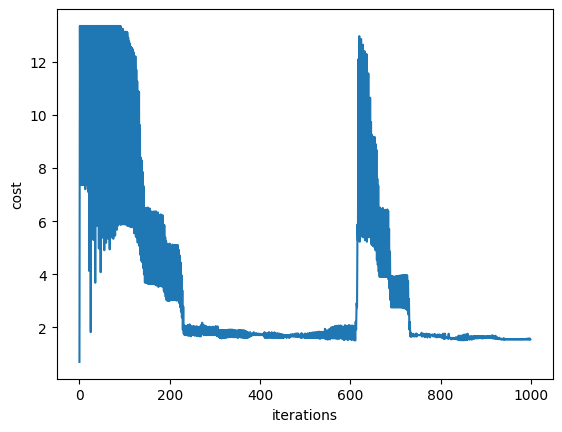

91.93548387096774 %


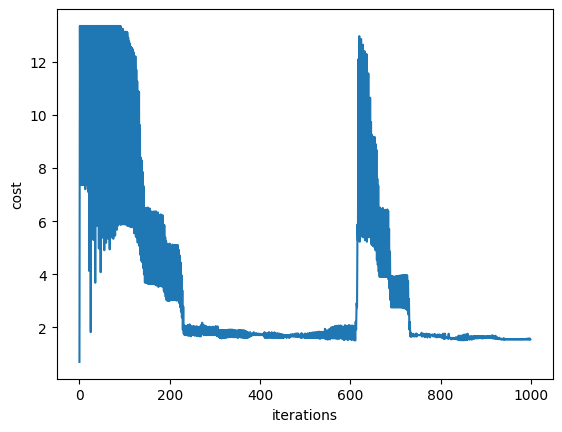

91.93548387096774 %


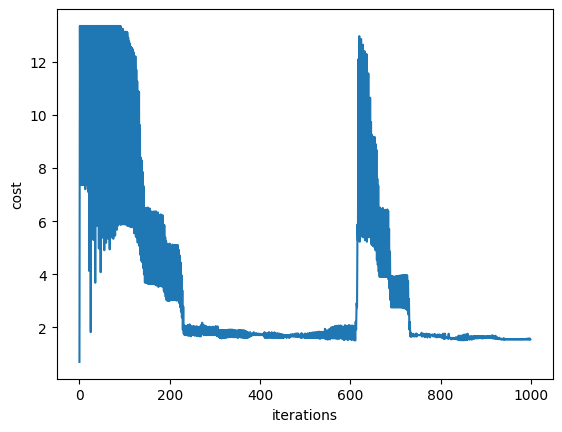

91.93548387096774 %


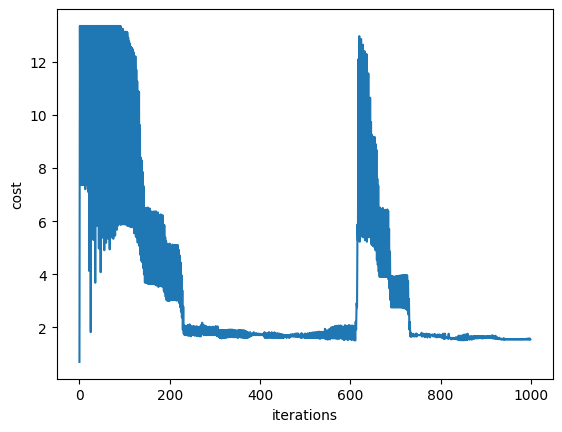

91.93548387096774 %


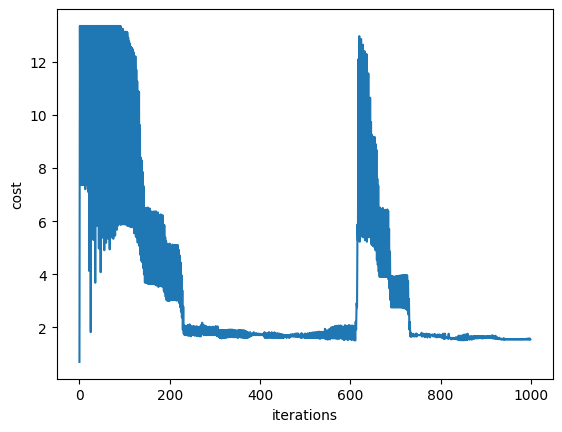

91.93548387096774 %

--------------mini batch gradient descent----------------------


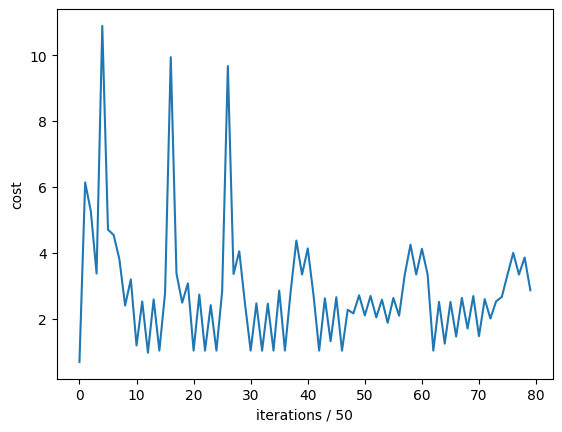

89.24731182795699 %

--------------stotastic gradient descent----------------------


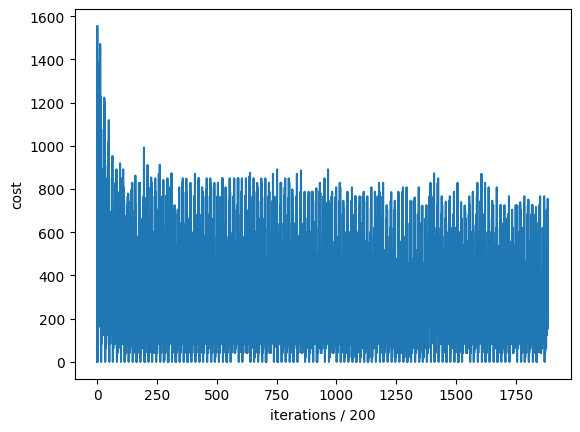

84.94623655913979 %


In [13]:
data= pd.read_csv("dataset.csv")
seed = random.randint(1,100)
training= data.sample(frac=0.67, random_state=seed)
test = data.drop(training.index)
training_fe1 = fe.FeatureEngineering(training.copy())
training_fe1.ds = training_fe1.ds.dropna()
test_fe1 = fe.FeatureEngineering(test.copy())
test_fe1.ds = test_fe1.ds.dropna()
test_class1 = test_fe1.ds['diagnosis'].to_numpy()
x_test1 = test_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()
for i in range(len(test_class1)):
    if(test_class1[i] == 'M'):
        test_class1[i] = 1
    else:
        test_class1[i] = 0
training_class1 = training_fe1.ds['diagnosis'].to_numpy()
for i in range(len(training_class1)):
    if(training_class1[i] == 'M'):
        training_class1[i] = 1
    else:
        training_class1[i] = 0
feature_ds1= training_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()


def accuracy(y_pred, y_test):
        return numpy.sum(y_pred==y_test)/len(y_test)

print("\n--------------batch gradient descent----------------------")

pt = 0.3
for i in range(5):
    lr1 = lr.LogisticRegression(0.01, 1000, pt) #we can alter the learning rate over here to see different results
    lr1.fit(feature_ds1.copy(), training_class1.copy(), 'bgd', True)
    y_pred1 = lr1.predict(x_test1.copy())
    acc1 = accuracy(y_pred1.copy(), test_class1.copy())
    print(acc1*100, "%")
    pt = pt + 0.1

print("\n--------------mini batch gradient descent----------------------")

lr2 = lr.LogisticRegression(0.01, 1000, 0.5) #we can alter the learning rate over here to see different results
lr2.fit(feature_ds1.copy(), training_class1.copy(), 'mbgd', True)
y_pred2 = lr2.predict(x_test1.copy())
acc2 = accuracy(y_pred2.copy(), test_class1.copy())
print(acc2*100, "%")

print("\n--------------stotastic gradient descent----------------------")

lr3 = lr.LogisticRegression(0.01, 1000, 0.5) #we can alter the learning rate over here to see different results
lr3.fit(feature_ds1.copy(), training_class1.copy(), 'sgd', True)
y_pred3 = lr3.predict(x_test1.copy())
acc3 = accuracy(y_pred3.copy(), test_class1.copy())
print(acc3*100, "%")

    

## Task 2
You should apply Feature Engineering Task 1 and Feature Engineering Task 2
and then build a classification model (LR2) using Logistic Regression. What happens to testing
accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7. 


--------------batch gradient descent----------------------


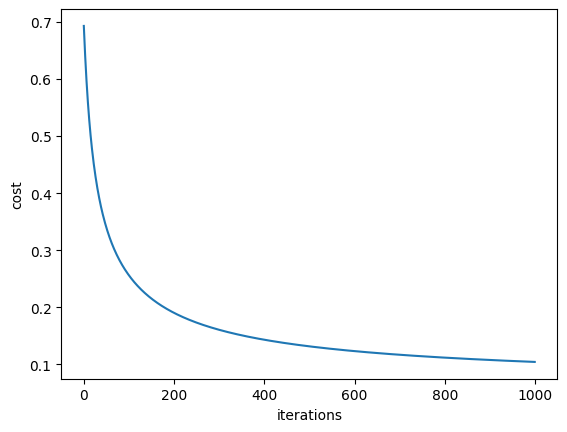

95.2127659574468 %


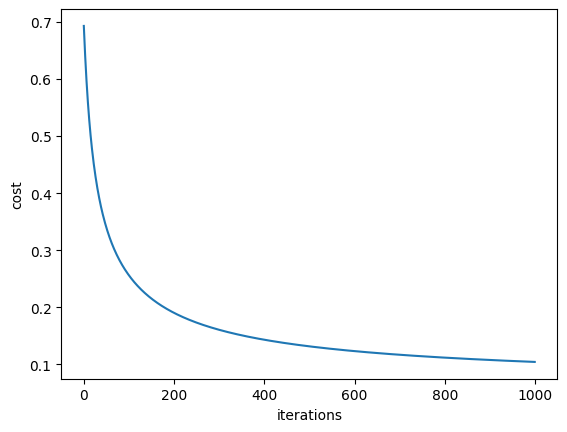

95.74468085106383 %


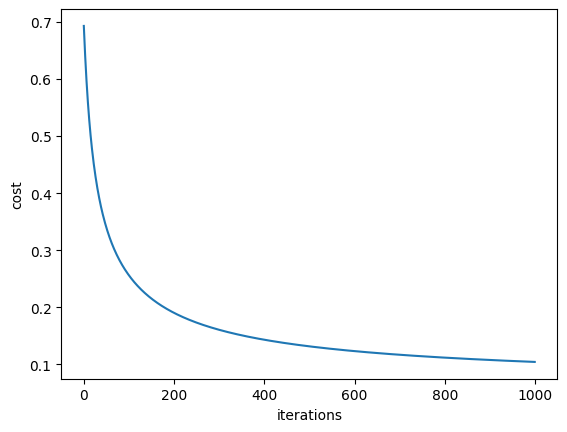

95.74468085106383 %


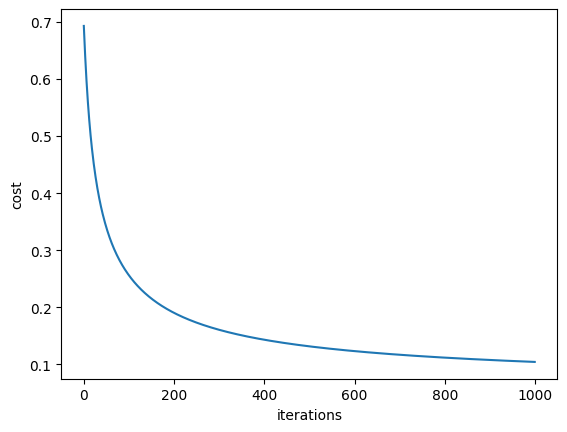

94.68085106382979 %


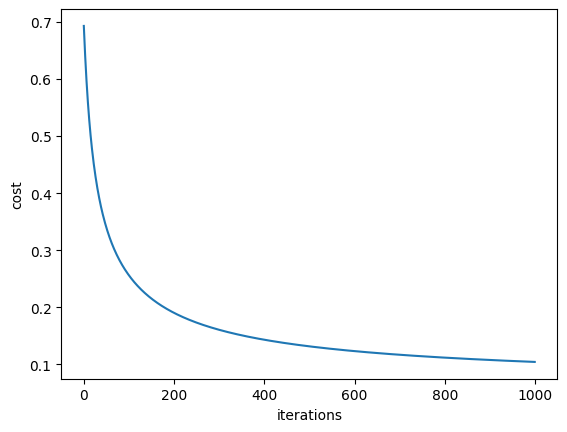

94.68085106382979 %

--------------mini batch gradient descent----------------------


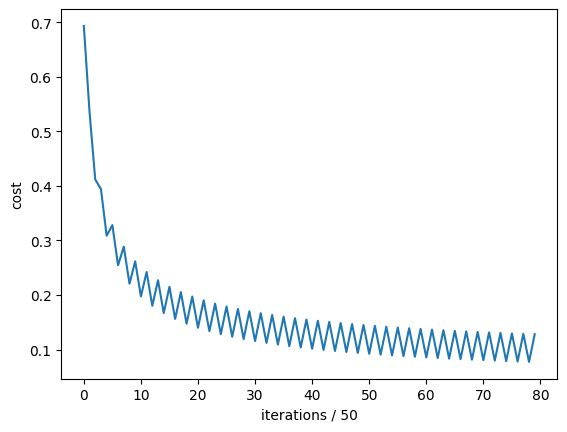

96.27659574468085 %

--------------stotastic gradient descent----------------------


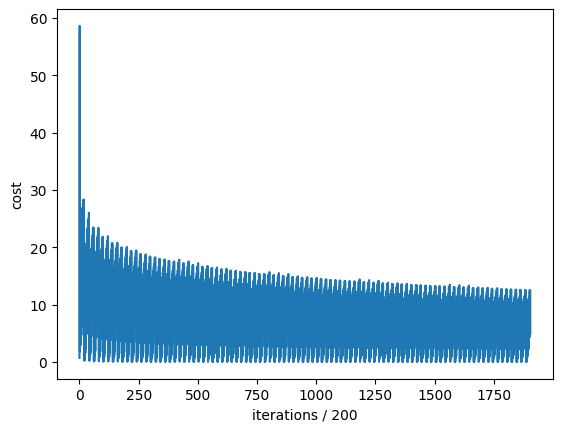

96.27659574468085 %


In [14]:
data= pd.read_csv("dataset.csv")
seed = random.randint(1,100)
training= data.sample(frac=0.67, random_state=seed)
test = data.drop(training.index)
training_fe1 = fe.FeatureEngineering(training.copy())
training_fe1.task1()
training_fe1.task2()
test_fe1 = fe.FeatureEngineering(test.copy())
test_fe1.task1()
test_fe1.task2()
test_class1 = test_fe1.ds['diagnosis'].to_numpy()
x_test1 = test_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()
for i in range(len(test_class1)):
    if(test_class1[i] == 'M'):
        test_class1[i] = 1
    else:
        test_class1[i] = 0
training_class1 = training_fe1.ds['diagnosis'].to_numpy()
for i in range(len(training_class1)):
    if(training_class1[i] == 'M'):
        training_class1[i] = 1
    else:
        training_class1[i] = 0
feature_ds1= training_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()

def accuracy(y_pred, y_test):
    return numpy.sum(y_pred==y_test)/len(y_test)

print("\n--------------batch gradient descent----------------------")

pt = 0.3
for i in range(5):
    lr1 = lr.LogisticRegression(0.01, 1000, pt) #we can alter the learning rate over here to see different results
    lr1.fit(feature_ds1.copy(), training_class1.copy(), 'bgd', True)
    y_pred1 = lr1.predict(x_test1.copy())
    acc1 = accuracy(y_pred1.copy(), test_class1.copy())
    print(acc1*100, "%")
    pt = pt + 0.1

print("\n--------------mini batch gradient descent----------------------")

lr2 = lr.LogisticRegression(0.01, 1000, 0.5) #we can alter the learning rate over here to see different results
lr2.fit(feature_ds1.copy(), training_class1.copy(), 'mbgd', True)
y_pred2 = lr2.predict(x_test1.copy())
acc2 = accuracy(y_pred2.copy(), test_class1.copy())
print(acc2*100, "%")

print("\n--------------stotastic gradient descent----------------------")

lr3 = lr.LogisticRegression(0.01, 1000, 0.5) #we can alter the learning rate over here to see different results
lr3.fit(feature_ds1.copy(), training_class1.copy(), 'sgd', True)
y_pred3 = lr3.predict(x_test1.copy())
acc3 = accuracy(y_pred3.copy(), test_class1.copy())
print(acc3*100, "%")

# Comparative Study

## Task 1
Perform a comparative study of models PM1, PM3, PM4, FLDM1, FLDM2, LR1
and LR2. The average performance metrics of 10 random training and testing splits should be
considered for this comparative study. Find out the best performing model and if possible explain
the reasons for that model to outcast other models.

--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  89.8936170212766 %
accuracy of PM3:  94.68085106382979 %
accuracy of PM4:  89.8936170212766 %
accuracy of FLDM1:  95.2127659574468 %
accuracy of FLDM2:  95.2127659574468 %
accuracy of LR1:  85.94594594594595 %
accuracy of LR2:  95.74468085106383 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  89.36170212765957 %
accuracy of PM3:  93.61702127659575 %
accuracy of PM4:  89.36170212765957 %
accuracy of FLDM1:  96.27659574468085 %
accuracy of FLDM2:  96.27659574468085 %
accuracy of LR1:  89.72972972972973 %
accuracy of LR2:  97.34042553191489 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  94.14893617021276 %
accuracy of PM3:  96.80851063829788 %
accuracy of PM4:  94.14893617021276 %
accuracy of FLDM1:  96.27659574468085 %
accuracy of FLDM2:  96.27659574468085 %
accuracy of LR1:  92.47311827956989 %
accuracy of LR2:  98.93617021276596 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  90.42553191489361 %
accuracy of PM3:  95.2127659574468 %
accuracy of PM4:  90.42553191489361 %
accuracy of FLDM1:  97.3404255319149 %
accuracy of FLDM2:  97.3404255319149 %
accuracy of LR1:  89.83957219251337 %
accuracy of LR2:  97.34042553191489 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  89.8936170212766 %
accuracy of PM3:  94.14893617021276 %
accuracy of PM4:  89.8936170212766 %
accuracy of FLDM1:  95.74468085106383 %
accuracy of FLDM2:  95.74468085106383 %
accuracy of LR1:  91.35135135135135 %
accuracy of LR2:  96.27659574468085 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  87.23404255319149 %
accuracy of PM3:  92.02127659574468 %
accuracy of PM4:  87.23404255319149 %
accuracy of FLDM1:  95.2127659574468 %
accuracy of FLDM2:  95.2127659574468 %
accuracy of LR1:  92.47311827956989 %
accuracy of LR2:  97.87234042553192 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  87.23404255319149 %
accuracy of PM3:  92.02127659574468 %
accuracy of PM4:  87.23404255319149 %
accuracy of FLDM1:  95.2127659574468 %
accuracy of FLDM2:  95.2127659574468 %
accuracy of LR1:  92.47311827956989 %
accuracy of LR2:  97.87234042553192 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  91.48936170212765 %
accuracy of PM3:  96.80851063829788 %
accuracy of PM4:  91.48936170212765 %
accuracy of FLDM1:  96.80851063829788 %
accuracy of FLDM2:  96.80851063829788 %
accuracy of LR1:  90.86021505376344 %
accuracy of LR2:  97.87234042553192 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  84.04255319148936 %
accuracy of PM3:  96.27659574468085 %
accuracy of PM4:  84.04255319148936 %
accuracy of FLDM1:  95.74468085106383 %
accuracy of FLDM2:  95.74468085106383 %
accuracy of LR1:  89.67391304347827 %
accuracy of LR2:  95.74468085106383 %
--------------------------------------------------


/Users/shubham/Documents/College/ML/Assignment1/logistic_reg.py:7: RuntimeWarning: overflow encountered in exp
  arr.append(1/(1+numpy.exp(-i)))


accuracy of PM1:  94.14893617021276 %
accuracy of PM3:  96.80851063829788 %
accuracy of PM4:  94.14893617021276 %
accuracy of FLDM1:  96.27659574468085 %
accuracy of FLDM2:  96.27659574468085 %
accuracy of LR1:  92.47311827956989 %
accuracy of LR2:  98.93617021276596 %
--------------------------------------------------
Mean accuracy of PM1:  89.7872340425532 %
Mean accuracy of PM3:  94.8404255319149 %
Mean accuracy of PM4:  89.7872340425532 %
Mean accuracy of FLDM1:  96.01063829787233 %
Mean accuracy of FLDM2:  96.01063829787233 %
Mean accuracy of LR1:  90.72932004350618 %
Mean accuracy of LR2:  97.3936170212766 %


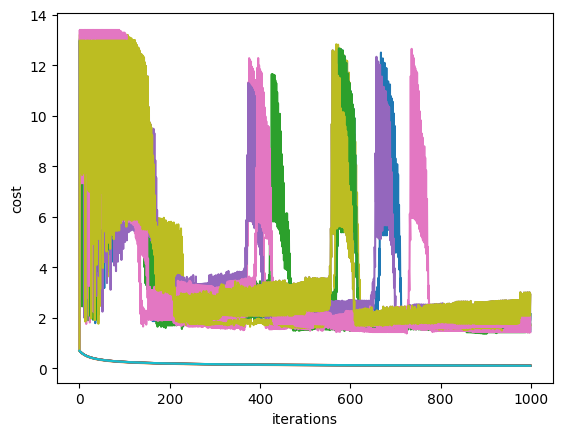

In [15]:
pm1acc_mean = 0
pm3acc_mean = 0
pm4acc_mean = 0
fldm1acc_mean = 0
fldm2acc_mean = 0
lr1acc_mean = 0
lr2acc_mean = 0
data= pd.read_csv("dataset.csv")
def accuracy(y_pred, y_test):
    return numpy.sum(y_pred==y_test)*100/len(y_test)
print("-"*50)
for i in range(10):
    seed = random.randint(1,100)
    training= data.sample(frac=0.67, random_state=seed)
    test = data.drop(training.index)
    pm1 = pe.Perceptron(training=training, test=test)
    pm1acc = pm1.perceptron(epochs=1000)
    seed2 = random.randint(1,100)
    pm4 = pe.Perceptron(training=training.sample(frac=1, axis=1,random_state=seed2), test=test.sample(frac=1, axis=1, random_state=seed2))
    pm4acc = pm4.perceptron(epochs=1000)
    training_fe = fe.FeatureEngineering(training.copy())
    training_fe.task1()
    training_fe.task2()
    test_fe = fe.FeatureEngineering(test.copy())
    test_fe.task1()
    test_fe.task2()
    pm3 = pe.Perceptron(training=training_fe.ds, test=test_fe.ds)
    pm3acc = pm3.perceptron(epochs=1000)
    fldm1 = fd.Fischers(training=training_fe.ds, test=test_fe.ds)
    fldm1acc = fldm1.fischers()
    seed3 = random.randint(1,100)
    fldm2 = fd.Fischers(training=training_fe.ds.sample(frac=1, axis=1, random_state=seed3), test=test_fe.ds.sample(frac=1, axis=1, random_state=seed3))
    fldm2acc = fldm2.fischers()

    training_fe1 = fe.FeatureEngineering(training.copy())
    training_fe1.ds = training_fe1.ds.dropna()
    test_fe1 = fe.FeatureEngineering(test.copy())
    test_fe1.ds = test_fe1.ds.dropna()
    test_class1 = test_fe1.ds['diagnosis'].to_numpy()
    x_test1 = test_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()
    for i in range(len(test_class1)):
        if(test_class1[i] == 'M'):
            test_class1[i] = 1
        else:
            test_class1[i] = 0
    training_class1 = training_fe1.ds['diagnosis'].to_numpy()
    for i in range(len(training_class1)):
        if(training_class1[i] == 'M'):
            training_class1[i] = 1
        else:
            training_class1[i] = 0
    feature_ds1= training_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()
    
    lr1 = lr.LogisticRegression(0.01, 1000, 0.5)
    lr1.fit(feature_ds1.copy(), training_class1.copy(), 'bgd', False)
    y_pred1 = lr1.predict(x_test1.copy())
    lr1acc = accuracy(y_pred1.copy(), test_class1.copy())

    training_fe1 = fe.FeatureEngineering(training.copy())
    training_fe1.task1()
    training_fe1.task2()
    test_fe1 = fe.FeatureEngineering(test.copy())
    test_fe1.task1()
    test_fe1.task2()
    test_class1 = test_fe1.ds['diagnosis'].to_numpy()
    x_test1 = test_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()
    for i in range(len(test_class1)):
        if(test_class1[i] == 'M'):
            test_class1[i] = 1
        else:
            test_class1[i] = 0
    training_class1 = training_fe1.ds['diagnosis'].to_numpy()
    for i in range(len(training_class1)):
        if(training_class1[i] == 'M'):
            training_class1[i] = 1
        else:
            training_class1[i] = 0
    feature_ds1= training_fe1.ds.drop(['id', 'diagnosis'], axis=1).to_numpy()

    lr2 = lr.LogisticRegression(0.01, 1000, 0.5)
    lr2.fit(feature_ds1.copy(), training_class1.copy(), 'bgd', False)
    y_pred2 = lr2.predict(x_test1.copy())
    lr2acc = accuracy(y_pred2.copy(), test_class1.copy())


    
    lr1acc_mean = lr1acc_mean + lr1acc
    lr2acc_mean = lr2acc_mean + lr2acc
    pm1acc_mean = pm1acc_mean + pm1acc
    pm3acc_mean = pm3acc_mean + pm3acc
    pm4acc_mean = pm4acc_mean + pm4acc
    fldm1acc_mean = fldm1acc_mean + fldm1acc
    fldm2acc_mean = fldm2acc_mean + fldm2acc
    print("accuracy of PM1: ", pm1acc , "%")
    print("accuracy of PM3: ", pm3acc , "%")
    print("accuracy of PM4: ", pm4acc , "%")
    print("accuracy of FLDM1: ", fldm1acc , "%")
    print("accuracy of FLDM2: ", fldm2acc , "%")
    print("accuracy of LR1: ", lr1acc , "%")
    print("accuracy of LR2: ", lr2acc , "%")
    print("-"*50)

print("Mean accuracy of PM1: ", pm1acc_mean/10 , "%")
print("Mean accuracy of PM3: ", pm3acc_mean/10 , "%")
print("Mean accuracy of PM4: ", pm4acc_mean/10 , "%")
print("Mean accuracy of FLDM1: ", fldm1acc_mean/10 , "%")
print("Mean accuracy of FLDM2: ", fldm2acc_mean/10 , "%")
print("Mean accuracy of LR1: ", lr1acc_mean/10 , "%")
print("Mean accuracy of LR2: ", lr2acc_mean/10 , "%")

# Observations

PM1 and PM2 give different results.
PM1 and PM3 also give different results (PM3 is usually much better).
PM1 and PM4 give same results.

FLDM1 and FLDM2 give the same results.

LR1 and LR2 give different results (LR2 is usually much better).

LR2 performed better than the rest in most cases, FLDM12 and PM3 also gave a decent accuracy. The models built on non normalised data usually gave worse results.